Часть первая, где запроган обычный сир

In [1]:
import numpy as np
import pylab as plt

In [2]:
def SIR(beta, gamma, I0, N):
    
    alpha_ts   = np.double([0.   , -5./9.  ,-153./128.])
    beta_ts    = np.double([1./3., 15./16. ,   8./15. ])
    Cdt = 0.5

    dt = Cdt/beta 

    SusceptibleArray = []
    InfectedArray = []
    RemovedArray = []
    TimeArray = []

    I=I0/N
    R=0.
    S=1-I
    dSdt=0.
    dIdt=0.
    dRdt=0.
    t=0.
    ds=0.
    dt = Cdt/beta 
    
    SusceptibleArray.append(S)
    InfectedArray.append(I)
    RemovedArray.append(R)
    TimeArray.append(t)

    while t<365:                                                                               
        dt_beta_ts = [i * dt for i in beta_ts]                                                                            
        for i in np.arange(0,2):
            dSdt = alpha_ts[i]*dSdt
            dIdt = alpha_ts[i]*dIdt
            dRdt = alpha_ts[i]*dRdt
            ds   = alpha_ts[i]*ds
                                                                               
            dSdt = dSdt - beta*I*S 
            dIdt = dIdt + beta*I*S - gamma*I
            dRdt = dRdt + gamma*I
            ds   = ds   + 1.    
        
            S = S + dt_beta_ts[i]*dSdt
            I = I + dt_beta_ts[i]*dIdt
            R = R + dt_beta_ts[i]*dRdt
            t = t + dt_beta_ts[i]*ds

        #print(S, I, R, t)
        SusceptibleArray.append(S)
        InfectedArray.append(I)
        RemovedArray.append(R)
        TimeArray.append(t)
    
            
    results = dict([('Susceptible', SusceptibleArray), ('Infected', InfectedArray), ('Removed', RemovedArray),('Time',TimeArray)])
        
    return results

Давайте что нибудь построим. Абстрактная Москва 

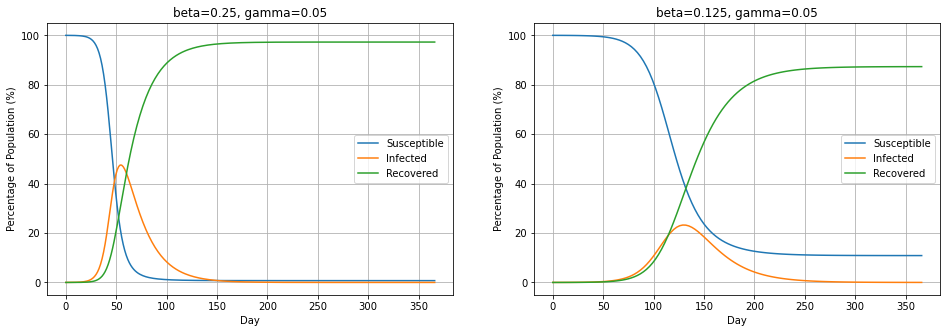

In [3]:
N=12000000

fig, ((plt1,plt2)) = plt.subplots(1,2,figsize=[16,5])
    
results = SIR(beta=0.25, gamma=0.05, I0=1000, N=12000000)

S=np.array(results['Susceptible'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])
mu=0.02
C=(1-mu)*R
D=mu*R

plt1.plot(t,100*S,label='Susceptible')
plt1.plot(t,100*I,label='Infected')
plt1.plot(t,100*C,label='Recovered')

plt1.legend()
plt1.grid()

results = SIR(beta=0.125, gamma=0.05, I0=1000, N=12000000)

S=np.array(results['Susceptible'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])
mu=0.02
C=(1-mu)*R
D=mu*R

plt2.plot(t,100*S,label='Susceptible')
plt2.plot(t,100*I,label='Infected')
plt2.plot(t,100*C,label='Recovered')

plt2.legend()
plt2.grid()

plt1.set_title("beta=0.25, gamma=0.05")
plt1.set_xlabel("Day")
plt1.set_ylabel("Percentage of Population (%)")

plt2.set_title("beta=0.125, gamma=0.05")
plt2.set_xlabel("Day")
plt2.set_ylabel("Percentage of Population (%)")

plt.show()

Часть вторая. На что влияет социальная дистация. Как мы видим выше, может отодвинуть пик и сделать его менее интенсивным.

На легенде R0 --- среднее количество людей, которых заразит больной человек до окончания болезни. Называется основным репродуктивным числом. Социальное дистанцирование снижает уровень инфицирования бету и, следовательно, базовое репродуктивное число.

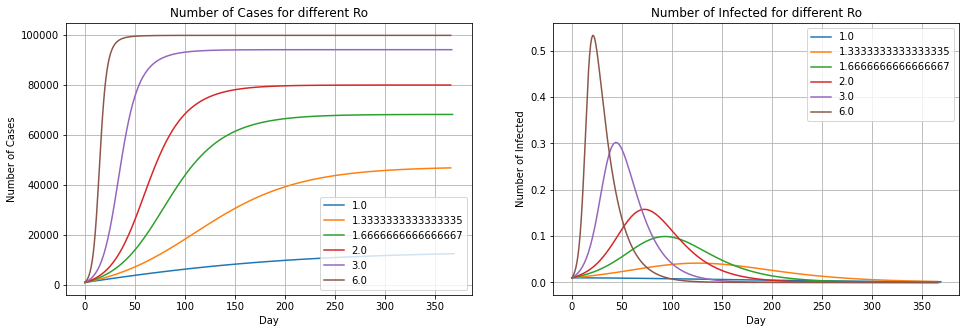

In [4]:

gamma=0.06
I0=1000
N=100000

fig, ((plt1,plt2)) = plt.subplots(1,2,figsize=[16,5])

for b in [0.06, 0.08, 0.10, 0.12, 0.18, 0.36]:
    
    results = SIR(beta=b, gamma=0.06, I0=1000, N=100000)
    
    S=np.array(results['Susceptible'])
    R=np.array(results['Removed'])
    I=np.array(results['Infected'])
    t=np.array(results['Time'])
    mu=0.02
    C=(1-mu)*R
    D=mu*R
    
    plt1.plot(t,N*(1-S), label=b/gamma)
    plt2.plot(t,I, label=b/gamma)

plt1.set_title("Number of Cases for different Ro")
plt1.set_xlabel("Day")
plt1.set_ylabel("Number of Cases")
plt1.legend()
plt1.grid()

plt2.set_title("Number of Infected for different Ro")
plt2.set_xlabel("Day")
plt2.set_ylabel("Number of Infected")
plt2.legend()
plt2.grid()

plt.show()

Часть третья, где я ориентируясь на https://www.nature.com/articles/s41598-021-84055-6.pdf пилю реальную Москву иииии тут возникает проблема подгона беты и гаммы, потому что хз где их взять. Данные: https://www.polymatica.ru/news/2020/dannye-po-koronavirusu-covid-19/

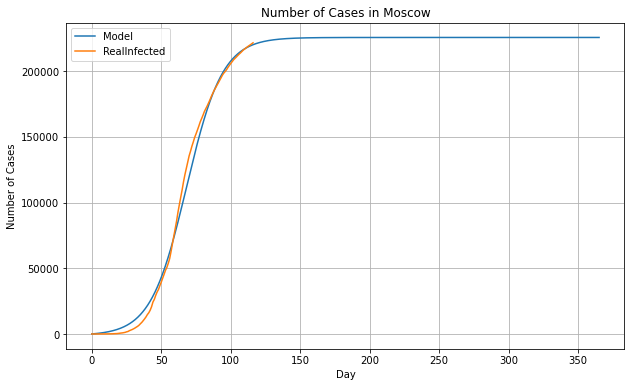

In [9]:
import pandas as pd

plt.figure(figsize=(10, 6))

N=12692466

results = SIR(beta=8.677, gamma=8.6, I0=10, N=12692466)

S=np.array(results['Susceptible'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])

plt.plot(t,N*(1-S), label='Model')



table = pd.read_excel('data.xlsx')
RI = table.values[:, 4]
t1 = list(range(len(RI)))

plt.plot(t1, RI, label='RealInfected')

plt.title("Number of Cases in Moscow")
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()

Если подобрать их максимально близко к реальному графику, получается, больше никто не должен заболеть))) Теперь а если подобрать максимально близко по начальным данным:

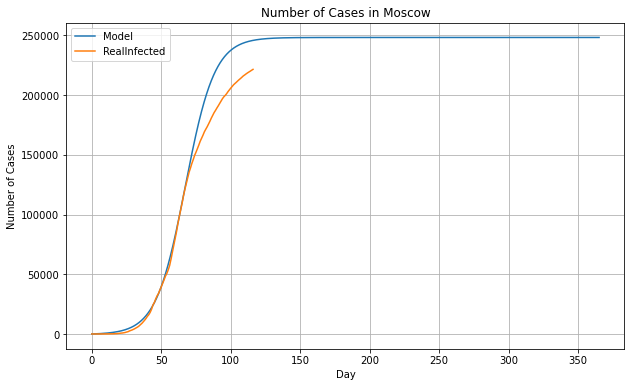

In [10]:
plt.figure(figsize=(10, 6))

gamma=0.06
I0=1000
N=12692466

results = SIR(beta=9.695, gamma=9.6, I0=4, N=12692466)

S=np.array(results['Susceptible'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])

plt.plot(t,N*(1-S), label='Model')



table = pd.read_excel('data.xlsx')
RI = table.values[:, 4]
t1 = list(range(len(RI)))

plt.plot(t1, RI, label='RealInfected')

plt.title("Number of Cases in Moscow")
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()

То как то так. Все равно скоро плато. И да, подобрать получилось только поставив бету и гамму в районе 10....
Тут начинает наблюдаться тупизм метода что он всегда +-быстро выходит на плато, а жизнь она не такая...

In [11]:
def SEIR(beta, gamma, delta, I0, N):
    
    alpha_ts   = np.double([0.   , -5./9.  ,-153./128.])
    beta_ts    = np.double([1./3., 15./16. ,   8./15. ])
    Cdt = 0.5

    dt = Cdt/beta 

    SusceptibleArray = []
    ExposedArray = []
    InfectedArray = []
    RemovedArray = []
    TimeArray = []

    I=I0/N
    R=0.
    E=0.
    S=1-I
    dSdt=0.
    dIdt=0.
    dRdt=0.
    dEdt=0.
    t=0.
    ds=0.
    dt = Cdt/beta 
    
    SusceptibleArray.append(S)
    ExposedArray.append(E)
    InfectedArray.append(I)
    RemovedArray.append(R)
    TimeArray.append(t)

    while t<365:                                                                               
        dt_beta_ts = [i * dt for i in beta_ts]                                                                            
        for i in np.arange(0,2):
            dSdt = alpha_ts[i]*dSdt
            dEdt = alpha_ts[i]*dEdt
            dIdt = alpha_ts[i]*dIdt
            dRdt = alpha_ts[i]*dRdt
            ds   = alpha_ts[i]*ds                                      
             
            
            dSdt = -beta * S * I
            dEdt = beta * S * I - delta * E
            dIdt = delta * E - gamma * I
            dRdt = gamma * I
            ds   = ds   + 1. 
        
            S = S + dt_beta_ts[i]*dSdt
            E = E + dt_beta_ts[i]*dEdt
            I = I + dt_beta_ts[i]*dIdt
            R = R + dt_beta_ts[i]*dRdt
            t = t + dt_beta_ts[i]*ds

        #print(S, I, R, t)
        SusceptibleArray.append(S)
        ExposedArray.append(E)
        InfectedArray.append(I)
        RemovedArray.append(R)
        TimeArray.append(t)
    
            
    results = dict([('Susceptible', SusceptibleArray), ('Exposed', ExposedArray), ('Infected', InfectedArray), ('Removed', RemovedArray),('Time',TimeArray)])
        
    return results

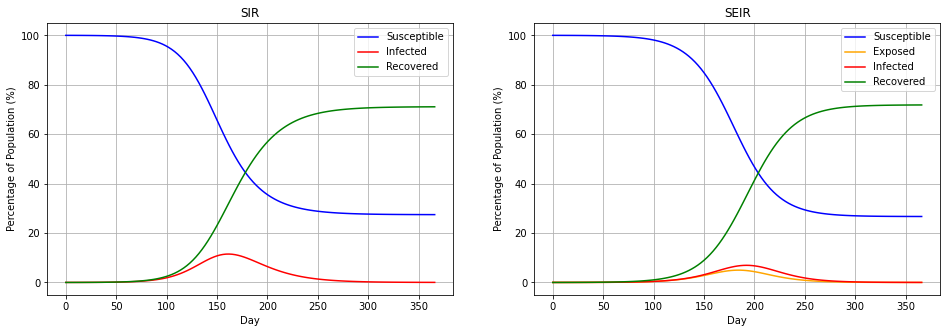

In [28]:
N=12000000

fig, ((plt2,plt1)) = plt.subplots(1,2,figsize=[16,5])
    

results = SIR(beta=0.125, gamma=0.07, I0=1000, N=12000000)

S=np.array(results['Susceptible'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])
mu=0.02
C=(1-mu)*R
D=mu*R

plt2.plot(t,100*S,label='Susceptible', color='b')
plt2.plot(t,100*I,label='Infected', color='r')
plt2.plot(t,100*C,label='Recovered', color='g')

plt2.legend()
plt2.grid()

results = SEIR(beta=0.125, gamma=0.07, delta=0.1, I0=1000, N=12000000)


S=np.array(results['Susceptible'])
E=np.array(results['Exposed'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])
mu=0.02
C=(1-mu)*R
D=mu*R

plt1.plot(t,100*S,label='Susceptible', color='b')
plt1.plot(t,100*E,label='Exposed', color='orange')
plt1.plot(t,100*I,label='Infected', color='r')
plt1.plot(t,100*C,label='Recovered', color='g')

plt1.legend()
plt1.grid()


plt1.set_title("SEIR")
plt1.set_xlabel("Day")
plt1.set_ylabel("Percentage of Population (%)")

plt2.set_title("SIR")
plt2.set_xlabel("Day")
plt2.set_ylabel("Percentage of Population (%)")

plt.show()

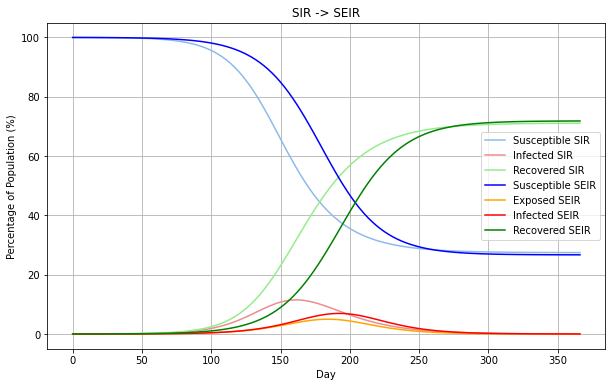

In [38]:
N=12000000

plt.figure(figsize=(10, 6))
    

results = SIR(beta=0.125, gamma=0.07, I0=1000, N=12000000)

S=np.array(results['Susceptible'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])
mu=0.02
C=(1-mu)*R
D=mu*R

plt.plot(t,100*S,label='Susceptible SIR', color='#8dbaeb')
plt.plot(t,100*I,label='Infected SIR', color='#eb8d8d')
plt.plot(t,100*C,label='Recovered SIR', color='#96eb8d')



results = SEIR(beta=0.125, gamma=0.07, delta=0.1, I0=1000, N=12000000)


S=np.array(results['Susceptible'])
E=np.array(results['Exposed'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])
mu=0.02
C=(1-mu)*R
D=mu*R

plt.plot(t,100*S,label='Susceptible SEIR', color='b')
plt.plot(t,100*E,label='Exposed SEIR', color='orange')
plt.plot(t,100*I,label='Infected SEIR', color='r')
plt.plot(t,100*C,label='Recovered SEIR', color='g')

plt.legend()
plt.grid()


plt.title("SIR -> SEIR")
plt.xlabel("Day")
plt.ylabel("Percentage of Population (%)")



plt.show()

Добавим вакцинацию

In [39]:
def SIRV(beta, gamma, v, I0, N):
    
    alpha_ts   = np.double([0.   , -5./9.  ,-153./128.])
    beta_ts    = np.double([1./3., 15./16. ,   8./15. ])
    Cdt = 0.5

    dt = Cdt/beta 

    SusceptibleArray = []
    VaccinatedArray = []
    InfectedArray = []
    RemovedArray = []
    TimeArray = []

    I=I0/N
    R=0.
    V=0.
    S=1-I
    dSdt=0.
    dIdt=0.
    dRdt=0.
    dVdt=0.
    t=0.
    ds=0.
    dt = Cdt/beta 
    
    SusceptibleArray.append(S)
    VaccinatedArray.append(V)
    InfectedArray.append(I)
    RemovedArray.append(R)
    TimeArray.append(t)

    while t<365:                                                                               
        dt_beta_ts = [i * dt for i in beta_ts]                                                                            
        for i in np.arange(0,2):
            dSdt = alpha_ts[i]*dSdt
            dVdt = alpha_ts[i]*dVdt
            dIdt = alpha_ts[i]*dIdt
            dRdt = alpha_ts[i]*dRdt
            ds   = alpha_ts[i]*ds                                      
             
            
            dSdt = -beta * S * I -v * S
            dIdt = beta * S * I - gamma * I
            dRdt = gamma * I
            dVdt = v * S
            ds   = ds  + 1. 
        
            S = S + dt_beta_ts[i]*dSdt
            V = V + dt_beta_ts[i]*dVdt
            I = I + dt_beta_ts[i]*dIdt
            R = R + dt_beta_ts[i]*dRdt
            t = t + dt_beta_ts[i]*ds

        #print(S, I, R, t)
        SusceptibleArray.append(S)
        VaccinatedArray.append(V)
        InfectedArray.append(I)
        RemovedArray.append(R)
        TimeArray.append(t)
    
            
    results = dict([('Susceptible', SusceptibleArray), ('Vaccinated', VaccinatedArray), ('Infected', InfectedArray), ('Removed', RemovedArray),('Time',TimeArray)])
        
    return results

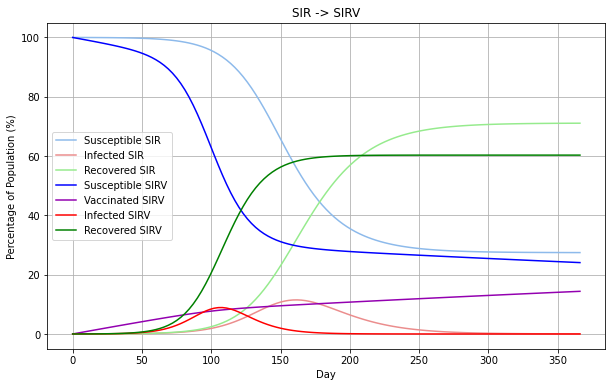

In [48]:
N=12000000

plt.figure(figsize=(10, 6))
    

results = SIR(beta=0.125, gamma=0.07, I0=1000, N=12000000)

S=np.array(results['Susceptible'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])
mu=0.02
C=(1-mu)*R
D=mu*R

plt.plot(t,100*S,label='Susceptible SIR', color='#8dbaeb')
plt.plot(t,100*I,label='Infected SIR', color='#eb8d8d')
plt.plot(t,100*C,label='Recovered SIR', color='#96eb8d')



results = SIRV(beta=0.125, gamma=0.07, v=0.0005, I0=1000, N=12000000)


S=np.array(results['Susceptible'])
V=np.array(results['Vaccinated'])
R=np.array(results['Removed'])
I=np.array(results['Infected'])
t=np.array(results['Time'])
mu=0.02
C=(1-mu)*R
D=mu*R

plt.plot(t,100*S,label='Susceptible SIRV', color='b')
plt.plot(t,100*V,label='Vaccinated SIRV', color='#9300b0')
plt.plot(t,100*I,label='Infected SIRV', color='r')
plt.plot(t,100*C,label='Recovered SIRV', color='g')

plt.legend()
plt.grid()


plt.title("SIR -> SIRV")
plt.xlabel("Day")
plt.ylabel("Percentage of Population (%)")



plt.show()

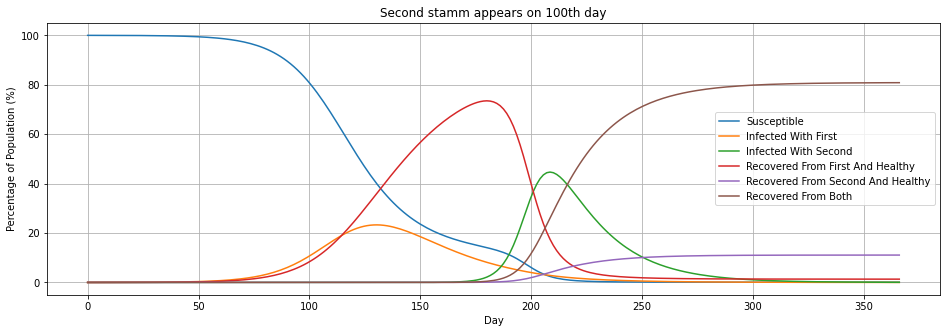

In [1]:


import numpy as np
import matplotlib.pyplot as plt

#социальная дистанция присутствует, но появляется второй штамм
def SIRI(beta1, gamma1, beta2, gamma2, day_of_appearance, I0, N):
    alpha_ts = np.double([0., -5. / 9., -153. / 128.])
    beta_ts = np.double([1. / 3., 15. / 16., 8. / 15.])
    Cdt = 0.5

    dt = Cdt / beta2

    SusceptibleArray = []
    InfectedWithFirstArray = []
    InfectedWithSecondArray = []
    RemovedFromFirstArray = []
    RemovedFromSecondArray = []
    RemovedFromBothArray = []
    TimeArray = []

    I1 = I0 / N
    R1 = 0.
    S = 1 - I1
    dSdt = 0.
    dI1dt = 0.
    dI2dt = 0.
    dR1dt = 0.
    dR2dt = 0.
    dRbothdt = 0.
    t = 0.
    ds = 0.
    dt = Cdt / beta2

    SusceptibleArray.append(S)
    InfectedWithFirstArray.append(I1)
    InfectedWithSecondArray.append(0)
    RemovedFromFirstArray.append(R1)
    RemovedFromSecondArray.append(0)
    RemovedFromBothArray.append(0)
    TimeArray.append(t)


    while t < day_of_appearance:
        dt_beta_ts = [i * dt for i in beta_ts]
        for i in np.arange(0, 2):
            dSdt = alpha_ts[i] * dSdt
            dI1dt = alpha_ts[i] * dI1dt
            dR1dt = alpha_ts[i] * dR1dt
            ds = alpha_ts[i] * ds

            dSdt = dSdt - beta1 * I1 * S
            dI1dt = dI1dt + beta1 * I1 * S - gamma1 * I1
            dR1dt = dR1dt + gamma1 * I1
            ds = ds + 1.

            S = S + dt_beta_ts[i] * dSdt
            I1 = I1 + dt_beta_ts[i] * dI1dt
            R1 = R1 + dt_beta_ts[i] * dR1dt
            t = t + dt_beta_ts[i] * ds

        # print(S, I, R, t)
        SusceptibleArray.append(S)
        InfectedWithFirstArray.append(I1)
        InfectedWithSecondArray.append(0)
        RemovedFromFirstArray.append(R1)
        RemovedFromSecondArray.append(0)
        RemovedFromBothArray.append(0)
        TimeArray.append(t)

    I2 = 1 / N
    R2 = 0
    Rb = 0
    R1I2 = 0;
    R2I1 = 0;
    dR1I2dt = 0;
    dR2I1dt = 0;
    dRbothdt = 0;

    while t < 365:
        dt_beta_ts = [i * dt for i in beta_ts]
        for i in np.arange(0, 2):
            dSdt = alpha_ts[i] * dSdt
            dI1dt = alpha_ts[i] * dI1dt
            dI2dt = alpha_ts[i] * dI2dt
            dR1dt = alpha_ts[i] * dR1dt
            dR2dt = alpha_ts[i] * dR2dt
            dR1I2dt = alpha_ts[i] * dR1I2dt
            dR2I1dt = alpha_ts[i] * dR2I1dt
            dRbothdt = alpha_ts[i] * dRbothdt
            ds = alpha_ts[i] * ds

            dSdt = dSdt - beta1 * (I1 + R2I1) * S - beta2 * (I2 + R1I2) * S
            dI1dt = dI1dt + beta1 * (I1 + R2I1) * S - gamma1 * I1
            dR2I1dt = dR2I1dt + beta1 * (I1 + R2I1) * R2 - gamma1 * R2I1
            dI2dt = dI2dt + beta2 * (I2 + R1I2) * S - gamma2 * I2
            dR1I2dt = dR1I2dt + beta2 * (I2 + R1I2) * (R1) - gamma2 * R1I2
            dR1dt = dR1dt + gamma1 * I1 - beta2 * (I2 + R1I2) * R1
            dR2dt = dR2dt + gamma2 * I2 - beta1 * (I1 + R2I1) * R2
            dRbothdt = dRbothdt + gamma1 * R2I1 + gamma2 * R1I2
            ds = ds + 1.

            S = S + dt_beta_ts[i] * dSdt
            I1 = I1 + dt_beta_ts[i] * dI1dt
            I2 = I2 + dt_beta_ts[i] * dI2dt
            R1 = R1 + dt_beta_ts[i] * dR1dt
            R2 = R2 + dt_beta_ts[i] * dR2dt
            R1I2 = R1I2 + dt_beta_ts[i] * dR1I2dt
            R2I1 = R2I1 + dt_beta_ts[i] * dR2I1dt
            Rb = Rb + dt_beta_ts[i] * dRbothdt
            t = t + dt_beta_ts[i] * ds

        SusceptibleArray.append(S)
        InfectedWithFirstArray.append(I1 + R2I1)
        InfectedWithSecondArray.append(I2 + R1I2)
        RemovedFromFirstArray.append(R1)
        RemovedFromSecondArray.append(R2)
        RemovedFromBothArray.append(Rb)
        TimeArray.append(t)

    results = dict([('Susceptible', SusceptibleArray), ('InfectedWithFirst', InfectedWithFirstArray),
                    ('InfectedWithSecond', InfectedWithSecondArray), ('RemovedFromFirst', RemovedFromFirstArray),
                    ('RemovedFromSecond', RemovedFromSecondArray), ('RemovedFromBoth', RemovedFromBothArray),
                    ('Time', TimeArray)])

    return results


N = 12000000

fig, ((plt1)) = plt.subplots(1, figsize=[16, 5])

results = SIRI(beta1=0.125, gamma1=0.05, beta2=0.25, gamma2=0.05, day_of_appearance=100, I0=1000, N=12000000)

S = np.array(results['Susceptible'])
R1 = np.array(results['RemovedFromFirst'])
R2 = np.array(results['RemovedFromSecond'])
Rb = np.array(results['RemovedFromBoth'])
I1 = np.array(results['InfectedWithFirst'])
I2 = np.array(results['InfectedWithSecond'])
t = np.array(results['Time'])
mu1 = 0.02
C1 = (1 - mu1) * R1
D1 = mu1 * R1

mu2 = 0.05
C2 = (1 - mu2) * R2
D2 = mu2 * R2

C = (1 - mu1) * (1 - mu2) * Rb

plt1.plot(t, 100 * S, label='Susceptible')
plt1.plot(t, 100 * I1, label='Infected With First')
plt1.plot(t, 100 * I2, label='Infected With Second')
plt1.plot(t, 100 * C1, label='Recovered From First And Healthy')
plt1.plot(t, 100 * C2, label='Recovered From Second And Healthy')
plt1.plot(t, 100 * C, label='Recovered From Both')


plt1.legend()
plt1.grid()

plt1.set_title("Second stamm appears on 100th day")
plt1.set_xlabel("Day")
plt1.set_ylabel("Percentage of Population (%)")

plt.show()